# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель проекта:** изучить объявления о продаже квартир в Санкт-Петербурге и области для отслеживания аномалий и мошеннической деятельности.

**Задачи проекта:** 
1. Привести данные в подходящий для анализа вид (определить и заполнить пропущенные значения, изменить тип данных где это требуется, устранить дубликаты и редкие выбивающиеся значения)
2. Добавить расчетные переменные 
3. Визуализировать данные
4. Решить поставленные задания
5. Сделать общий вывод по проекту

### Откроем файл с данными и изучим общую информацию. 

In [1]:
#импорт библиотек
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', '\t') #открытие файла estate_data.csv

In [3]:
data.info() #получение информации о переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', None)
data.head() #выведение первых 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.tail() #выведение последних 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe() #выведем описание статистических показателей

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
data.duplicated().sum() #проверка на дубликаты

0

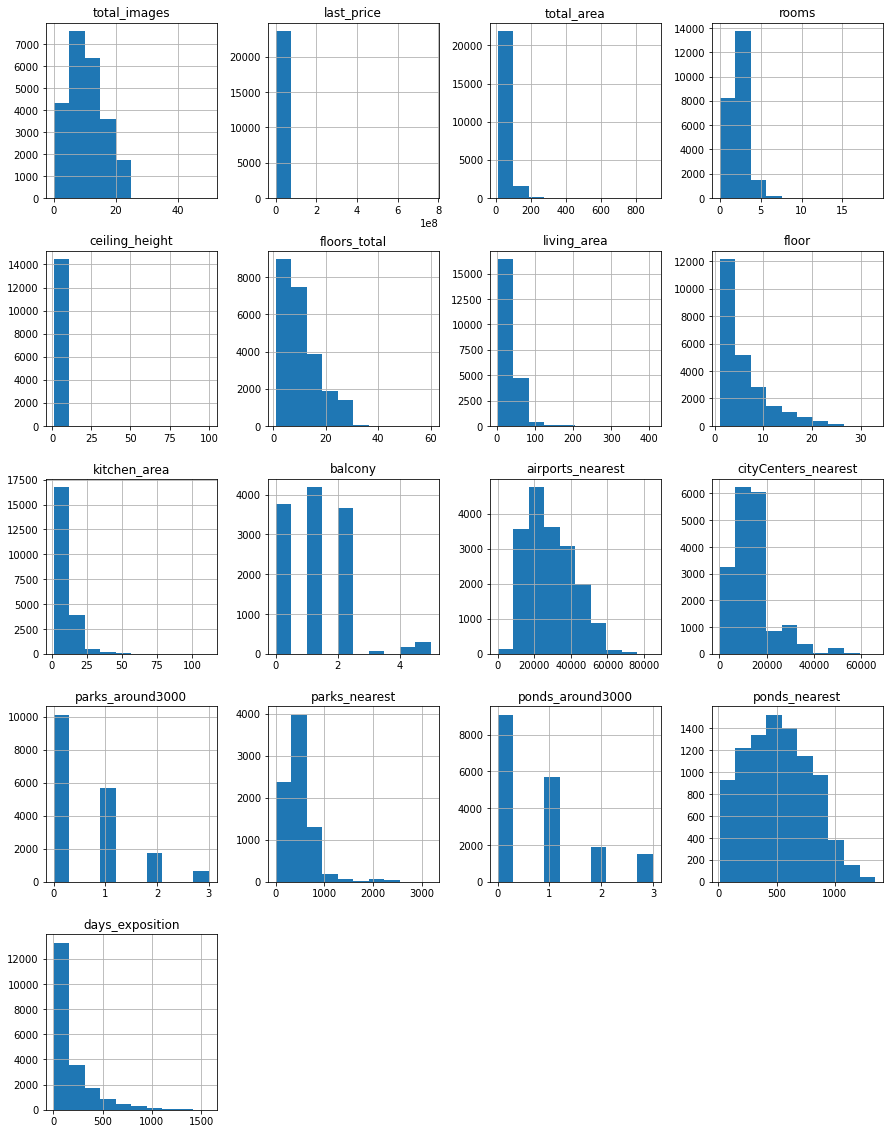

In [8]:
data.hist(figsize=(15, 20)); #построение гистограмм для всех числовых столбцов

После предварительного взгляда на данные, видно, что часть переменных имеют неправильный тип, а также база по многим переменным имеет пропуски, аномальные значения.

### Предобработка данных

In [9]:
#выведем все переменные

data.columns.tolist()


['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [10]:
#поменяем порядок столбцов

data = data[[
    'locality_name',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'balcony',
    'ceiling_height',
    'floor',
    'floors_total',
    'is_apartment',
    'studio',
    'open_plan',
    'total_images',
    'last_price',
    'first_day_exposition',
    'days_exposition',
    'cityCenters_nearest',
    'airports_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
  
]]

data.head()

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,108.0,51.0,25.0,3,NaN,2.70,8,16.0,NaN,False,False,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,1,2.0,NaN,1,11.0,NaN,False,False,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,2,0.0,NaN,4,5.0,NaN,False,False,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,3,0.0,NaN,9,14.0,NaN,False,False,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,2,NaN,3.03,13,14.0,NaN,False,False,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [11]:
data.isnull().sum().sort_values() #выведение числа пропусков

studio                      0
total_area                  0
first_day_exposition        0
last_price                  0
rooms                       0
total_images                0
open_plan                   0
floor                       0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [12]:
#удалим пропущенные значения с населенным пунктом
data = data.dropna(subset=['locality_name'])

In [13]:
data.isnull().sum().sort_values() #проверим, удалились ли строки без населенного пункта

locality_name               0
first_day_exposition        0
last_price                  0
total_images                0
open_plan                   0
floor                       0
studio                      0
rooms                       0
total_area                  0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
ponds_around3000         5510
parks_around3000         5510
cityCenters_nearest      5511
airports_nearest         5534
ceiling_height           9160
balcony                 11513
ponds_nearest           14565
parks_nearest           15586
is_apartment            20890
dtype: int64

In [14]:
#присвоим пропущенной этажности здания этаж объекта на продажу
data.loc[data['floors_total'].isnull(), 'floors_total'] = data.loc[data['floors_total'].isnull(), 'floor']

In [15]:
data.isnull().sum().sort_values() #проверим

locality_name               0
first_day_exposition        0
last_price                  0
total_images                0
open_plan                   0
floors_total                0
floor                       0
studio                      0
rooms                       0
total_area                  0
living_area              1898
kitchen_area             2269
days_exposition          3180
ponds_around3000         5510
parks_around3000         5510
cityCenters_nearest      5511
airports_nearest         5534
ceiling_height           9160
balcony                 11513
ponds_nearest           14565
parks_nearest           15586
is_apartment            20890
dtype: int64

In [16]:
#убираем пропуски балконов, заменяя на ноль и приводя к целочисленному значению
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [17]:
data.isnull().sum().sort_values() #проверим

locality_name               0
first_day_exposition        0
last_price                  0
total_images                0
open_plan                   0
floors_total                0
floor                       0
studio                      0
balcony                     0
rooms                       0
total_area                  0
living_area              1898
kitchen_area             2269
days_exposition          3180
ponds_around3000         5510
parks_around3000         5510
cityCenters_nearest      5511
airports_nearest         5534
ceiling_height           9160
ponds_nearest           14565
parks_nearest           15586
is_apartment            20890
dtype: int64

In [18]:
# по апартаментам применим логику, что если значение пропущено, то это не апартаменты
data['is_apartment'] = data['is_apartment'].fillna('')
data['is_apartment'] = data['is_apartment'].astype('bool')

In [19]:
data.isnull().sum().sort_values() #проверим

locality_name               0
first_day_exposition        0
last_price                  0
total_images                0
open_plan                   0
is_apartment                0
floors_total                0
studio                      0
balcony                     0
rooms                       0
total_area                  0
floor                       0
living_area              1898
kitchen_area             2269
days_exposition          3180
ponds_around3000         5510
parks_around3000         5510
cityCenters_nearest      5511
airports_nearest         5534
ceiling_height           9160
ponds_nearest           14565
parks_nearest           15586
dtype: int64

In [20]:
#пропущенные значения потолков приведем к медианному значению

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [21]:
data.isnull().sum().sort_values() #проверим удалились ли пропуски

locality_name               0
first_day_exposition        0
last_price                  0
total_images                0
open_plan                   0
is_apartment                0
floors_total                0
studio                      0
ceiling_height              0
balcony                     0
rooms                       0
total_area                  0
floor                       0
living_area              1898
kitchen_area             2269
days_exposition          3180
ponds_around3000         5510
parks_around3000         5510
cityCenters_nearest      5511
airports_nearest         5534
ponds_nearest           14565
parks_nearest           15586
dtype: int64

Таким образом, мы удалили все возможные пропуски. Корректно убрать пропуски жилой площади и площади кухни не получится. Дни представления с пропущенными значениями вероятно подразумевают, что объявление еще актуально. Остальные параметры были получены автоматически, поэтому не будем их заполнять и оставим как есть.

In [22]:
#приведем дату публикации объявления к формату даты

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [23]:
data.info() #проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         23650 non-null  object        
 1   total_area            23650 non-null  float64       
 2   living_area           21752 non-null  float64       
 3   kitchen_area          21381 non-null  float64       
 4   rooms                 23650 non-null  int64         
 5   balcony               23650 non-null  int64         
 6   ceiling_height        23650 non-null  float64       
 7   floor                 23650 non-null  int64         
 8   floors_total          23650 non-null  float64       
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  total_images          23650 non-null  int64         
 13  last_price      

In [24]:
#приведем к целочисленному формату этажность зданий, где продаются квартиры

data['floors_total'] = data['floors_total'].astype('int')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         23650 non-null  object        
 1   total_area            23650 non-null  float64       
 2   living_area           21752 non-null  float64       
 3   kitchen_area          21381 non-null  float64       
 4   rooms                 23650 non-null  int64         
 5   balcony               23650 non-null  int64         
 6   ceiling_height        23650 non-null  float64       
 7   floor                 23650 non-null  int64         
 8   floors_total          23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  total_images          23650 non-null  int64         
 13  last_price      

In [26]:
#устраняем неявные дубликаты в населенных пунктах

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
# много, посчитаем сколько
len(data['locality_name'].unique())

364

In [28]:
# приведем к нижнему регистру и проверим изменения

data['locality_name'] = data['locality_name'].str.lower()

In [29]:
# ничего не поменялось
len(data['locality_name'].unique())

364

In [30]:
#в списке всех населенных пунктов видно, что где-то в слове поселок указана буква е, а где-то ё

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [31]:
#удалили 34 неявных дубликата
len(data['locality_name'].unique())

330

In [32]:
#проверим выбивающиеся значения
data.describe()

,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,total_images,last_price,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,23650.000000,21752.000000,21381.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,2.365000e+04,20470.000000,18139.000000,18116.000000,18140.000000,8064.000000,18140.000000,9085.000000
mean,60.329069,34.448356,10.566403,2.070106,0.591712,2.724311,5.893277,10.673784,9.862326,6.541127e+06,180.753200,14197.860742,28803.225878,0.611577,490.830729,0.769680,518.059879
std,35.661808,22.037664,5.901753,1.078620,0.959662,0.989255,4.883317,6.593455,5.682278,1.089640e+07,219.777916,8606.830295,12637.314144,0.802003,342.554386,0.937948,277.841733
min,12.000000,2.000000,1.300000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.219000e+04,1.000000,181.000000,0.000000,0.000000,1.000000,0.000000,13.000000
25%,40.000000,18.600000,7.000000,1.000000,0.000000,2.600000,2.000000,5.000000,6.000000,3.400000e+06,45.000000,9241.000000,18575.750000,0.000000,288.000000,0.000000,293.000000
50%,52.000000,30.000000,9.100000,2.000000,0.000000,2.650000,4.000000,9.000000,9.000000,4.650000e+06,95.000000,13105.000000,26756.500000,0.000000,454.500000,1.000000,502.000000
75%,69.700000,42.300000,12.000000,3.000000,1.000000,2.700000,8.000000,16.000000,14.000000,6.799000e+06,231.000000,16293.000000,37294.000000,1.000000,612.000000,1.000000,730.000000
max,900.000000,409.700000,112.000000,19.000000,5.000000,100.000000,33.000000,60.000000,50.000000,7.630000e+08,1580.000000,65968.000000,84869.000000,3.000000,3190.000000,3.000000,1344.000000


In [33]:
#удалим аномальные значения высоты потолков 
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 5), 'ceiling_height'] = None

In [34]:
data['ceiling_height'].describe() #проверим

count    23611.000000
mean         2.696015
std          0.215586
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

In [35]:
#этажность двух самых высоких зданий вызывает сомнение

data['floors_total'].sort_values()

21603     1
19590     1
4379      1
10817     1
17020     1
         ..
5807     36
11079    36
16934    37
16731    52
2253     60
Name: floors_total, Length: 23650, dtype: int64

In [36]:
#устраним эти значения
data.loc[(data['floors_total'] > 37), 'floors_total'] = None

In [37]:
data['floors_total'].describe() #проверим

count    23648.000000
mean        10.669951
std          6.580440
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

In [38]:
#рассмаотрим максимальные и минимальные значения последней цены
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23650, dtype: float64

In [39]:
#здесь скорее всего указали значение в тысячах
data[data['last_price'] < 100000]


,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
8793,санкт-петербург,109.0,32.0,40.5,2,0,2.75,25,25.0,False,False,False,7,12190.0,2019-03-20,8.0,9176.0,36421.0,1.0,805.0,0.0,NaN


In [40]:
#перемножим на тысячу
data.loc[(data['last_price'] < 100000), 'last_price'] = data['last_price']*1000
    

In [41]:
#проверим
data['last_price'].sort_values()

17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
5698        450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23650, dtype: float64

### Посчитаем и добавим в таблицу новые столбцы

In [42]:
#добавляем цену за квадратный метр
data['price_1_m'] = data['last_price'] / data['total_area']

In [43]:
data.head() #проверим

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_1_m
0,санкт-петербург,108.0,51.0,25.0,3,0,2.70,8,16.0,False,False,False,20,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.370370
1,поселок шушары,40.4,18.6,11.0,1,2,2.65,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.792079
2,санкт-петербург,56.0,34.3,8.3,2,0,2.65,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.714286
3,санкт-петербург,159.0,NaN,NaN,3,0,2.65,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.100629
4,санкт-петербург,100.0,32.0,41.0,2,0,3.03,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.000000


In [44]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #добавляем день недели публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month #добавляем месяц публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year #добавляем год публикации объявления

In [45]:
data.head() #проверим

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_1_m,weekday_exposition,month_exposition,year_exposition
0,санкт-петербург,108.0,51.0,25.0,3,0,2.70,8,16.0,False,False,False,20,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.370370,3,3,2019
1,поселок шушары,40.4,18.6,11.0,1,2,2.65,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.792079,1,12,2018
2,санкт-петербург,56.0,34.3,8.3,2,0,2.65,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.714286,3,8,2015
3,санкт-петербург,159.0,NaN,NaN,3,0,2.65,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.100629,4,7,2015
4,санкт-петербург,100.0,32.0,41.0,2,0,3.03,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.000000,1,6,2018


In [46]:
#добавим категории для этажности
data['floor_type'] = ['другой']*len(data)
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'

In [47]:
data.tail() #проверим

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_1_m,weekday_exposition,month_exposition,year_exposition,floor_type
23694,санкт-петербург,133.81,73.3,13.83,3,0,3.70,3,5.0,False,False,False,9,9700000.0,2017-03-21,NaN,4232.0,24665.0,1.0,796.0,3.0,381.0,72490.845228,1,3,2017,другой
23695,тосно,59.00,38.0,8.50,3,0,2.65,4,5.0,False,False,False,14,3100000.0,2018-01-15,45.0,NaN,NaN,NaN,NaN,NaN,NaN,52542.372881,0,1,2018,другой
23696,село рождествено,56.70,29.7,NaN,2,0,2.65,1,3.0,False,False,False,18,2500000.0,2018-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый
23697,санкт-петербург,76.75,NaN,23.30,2,2,3.00,12,17.0,False,False,False,13,11475000.0,2017-03-28,602.0,10364.0,39140.0,2.0,173.0,3.0,196.0,149511.400651,1,3,2017,другой
23698,поселок новый учхоз,32.30,12.3,9.00,1,0,2.50,1,5.0,False,False,False,4,1350000.0,2017-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.665635,4,7,2017,первый


In [48]:
#добавим расстояние в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

In [49]:
#округлим значение до целого
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

In [50]:
data.head() #проверим

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_1_m,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,санкт-петербург,108.0,51.0,25.0,3,0,2.70,8,16.0,False,False,False,20,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.370370,3,3,2019,другой,16.0
1,поселок шушары,40.4,18.6,11.0,1,2,2.65,1,11.0,False,False,False,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.792079,1,12,2018,первый,19.0
2,санкт-петербург,56.0,34.3,8.3,2,0,2.65,4,5.0,False,False,False,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.714286,3,8,2015,другой,14.0
3,санкт-петербург,159.0,NaN,NaN,3,0,2.65,9,14.0,False,False,False,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.100629,4,7,2015,другой,7.0
4,санкт-петербург,100.0,32.0,41.0,2,0,3.03,13,14.0,False,False,False,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.000000,1,6,2018,другой,8.0


### Проведем исследовательский анализ данных

In [51]:
data['total_area'].describe() #посмотрим на статистические показатели общей площади

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'Общая площадь, кв.м.'}, ylabel='Frequency'>

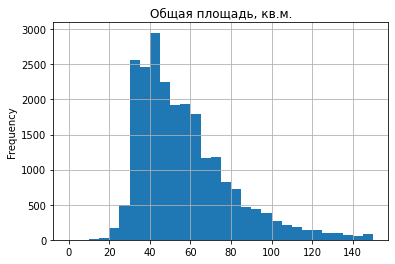

In [52]:
data['total_area'].plot(kind='hist', bins=30, range=(0,150), title='Общая площадь, кв.м.', grid=True)

Наибольшое распространение среди объявлений имеют небольшие квартиры от 30 до 50 квадратных метров

In [53]:
data['living_area'].describe() #посмотрим на статистические показатели жилой площади

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'Жилая площадь, кв.м.'}, ylabel='Frequency'>

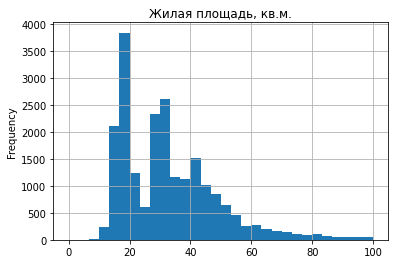

In [54]:
data['living_area'].plot(kind='hist', bins=30, range=(0,100), title='Жилая площадь, кв.м.', grid=True)

Наблюдаем два пиковых значений, предположительно, это разделение на 1 и 2 комнатные квартиры.

In [55]:
data['kitchen_area'].describe() #посмотрим на статистические показатели площади кухни

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Площадь кухни, кв.м.'}, ylabel='Frequency'>

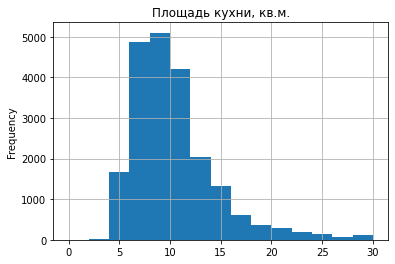

In [56]:
data['kitchen_area'].plot(kind='hist', bins=15, range=(0,30), title='Площадь кухни, кв.м.', grid=True)

Наиболее распространенная площадь кухонь от 6 до 12 кв.м.

In [57]:
data['last_price'].describe() #посмотрим на статистические показатели стоимости

count    2.365000e+04
mean     6.541642e+06
std      1.089638e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [58]:
data['last_price'] = data['last_price'] / 1000000 #разделим на 1 млн для более понятного вида

<AxesSubplot:title={'center':'Цена объекта, млн руб.'}, ylabel='Frequency'>

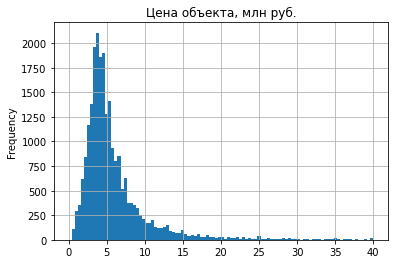

In [59]:
data['last_price'].plot(kind='hist', bins=100, range=(0, 40), title='Цена объекта, млн руб.', grid=True)

Наиболее распространенная стоимость объекта от 3 до 5 млн руб.

In [60]:
data['rooms'].describe() #посмотрим на статистические показатели числа комнат

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

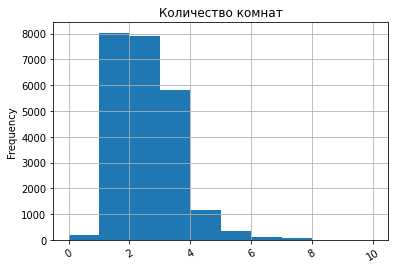

In [61]:
data['rooms'].plot(kind='hist', bins=10, range=(0,10), title='Количество комнат', rot=30,  grid=True)

Как и было ранее предположено, наиболее распространенное количество комнат - 1 и 2.

In [62]:
data['ceiling_height'].describe() #посмотрим на статистические показатели высоты потолков

count    23611.000000
mean         2.696015
std          0.215586
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Высота потолков, м'}, ylabel='Frequency'>

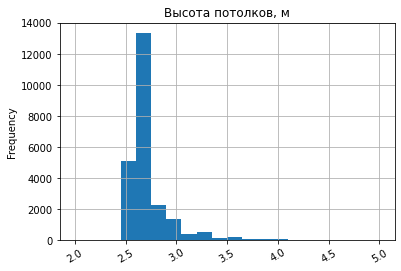

In [63]:
data['ceiling_height'].plot(kind='hist', bins=20, range=(2,5), title='Высота потолков, м', rot=30,  grid=True)

Наиболее распространенный вариант - стандарт 2,7 м.

In [64]:
data['floor'].describe() #посмотрим на статистические показатели этажа объекта

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:title={'center':'Этаж'}, ylabel='Frequency'>

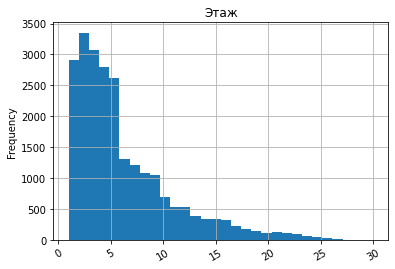

In [65]:
data['floor'].plot(kind='hist', bins=30, range=(1, 30), title='Этаж', rot=30,  grid=True)

Наиболее распространенные этажи квартир - с 1 по 5, но есть объекты на 20 этаже и выше

In [66]:
data['floor_type'].value_counts() #посмотрим распределение по типу этажа

другой       17326
последний     3440
первый        2884
Name: floor_type, dtype: int64

Из полученных данных можно сделать вывод, что квартиры на последних этажах продают чаще, чем на первых.

In [67]:
data['floors_total'].describe() #посмотрим на статистические показатели этажности здания

count    23648.000000
mean        10.669951
std          6.580440
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'Всего этажей в доме'}, ylabel='Frequency'>

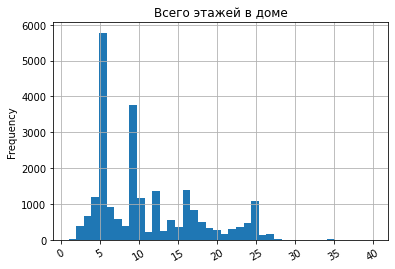

In [68]:
data['floors_total'].plot(kind='hist', bins=40, range=(1,40), title='Всего этажей в доме', rot=30,  grid=True)

Наиболее популярную этажность у пяти- и девятиэтажек, что неудивительно для российской действительности.

In [69]:
data['cityCenters_nearest'].describe() #посмотрим на статистические показатели расстояния до центра города

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:title={'center':'Расстояние до центра города, м'}, ylabel='Frequency'>

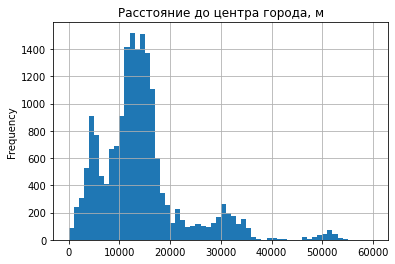

In [70]:
data['cityCenters_nearest'].plot(kind='hist', bins=60, range=(1,60000), title='Расстояние до центра города, м', grid=True)

Наиболее распространенная удаленность от центра города составляет от 10 до 17 км

In [71]:
data['airports_nearest'].describe() #посмотрим на статистические показатели расстояния до аэропорта

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:title={'center':'Расстояние до ближайшего аэропорта, м'}, ylabel='Frequency'>

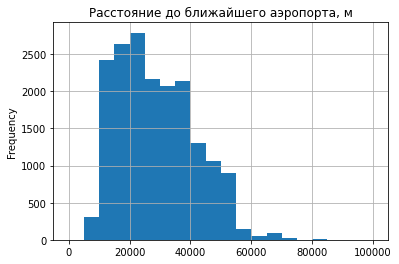

In [72]:
data['airports_nearest'].plot(kind='hist', bins=20, range=(1,100000), title='Расстояние до ближайшего аэропорта, м', grid=True)

Наиболее распространенная удаленность от ближайшего аэропорта составляет от 10 до 40 км. Обнаружено значение с удаленность 0 метров.

In [73]:
data.loc[(data['airports_nearest'] < 1000), 'airports_nearest'] = None #заменим значение с 0 метров на Nan

In [74]:
data['airports_nearest'].sort_values() #проверим

12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
22283    6989.0
          ...  
23683       NaN
23692       NaN
23695       NaN
23696       NaN
23698       NaN
Name: airports_nearest, Length: 23650, dtype: float64

<AxesSubplot:title={'center':'Расстояние до ближайшего аэропорта, м'}, ylabel='Frequency'>

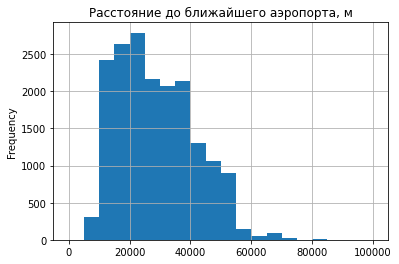

In [75]:
data['airports_nearest'].plot(kind='hist', bins=20, range=(1,100000), title='Расстояние до ближайшего аэропорта, м', grid=True)

In [76]:
data['parks_nearest'].describe() #посмотрим на статистические показатели расстояния до ближайшего парка

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'Расстояние до ближайшего парка, м'}, ylabel='Frequency'>

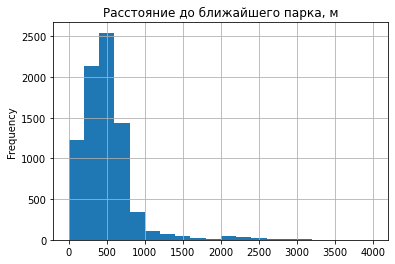

In [77]:
data['parks_nearest'].plot(kind='hist', bins=20, range=(1,4000), title='Расстояние до ближайшего парка, м', grid=True)

В бальшинстве случаев парк доступен в пределах 1 км

В бальшинстве случаев парк доступен в пределах 1 км

In [78]:
data['weekday_exposition'].describe() #посмотрим на статистические показатели дня недели публикации объявления

count    23650.000000
mean         2.568710
std          1.788808
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

<AxesSubplot:title={'center':'День публикации объявления'}, ylabel='Frequency'>

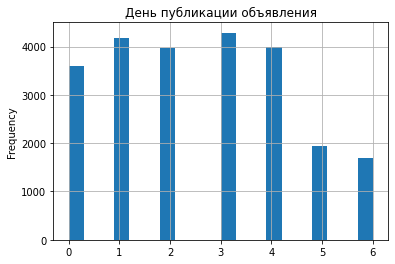

In [79]:
data['weekday_exposition'].plot(kind='hist', bins=20, range=(0,6), title='День публикации объявления', grid=True)

В будни чаще выкладывают объявления о продаже. Самый популярный день - четверг.

In [80]:
data['month_exposition'].describe() #посмотрим на статистические показатели месяца публикации объявления

count    23650.000000
mean         6.401564
std          3.491418
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

<AxesSubplot:title={'center':'Месяц публикации объявления'}, ylabel='Frequency'>

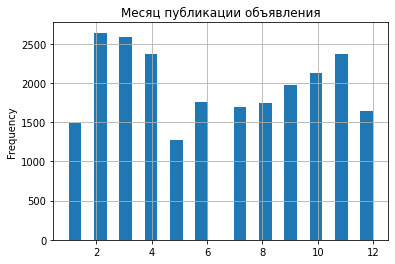

In [81]:
data['month_exposition'].plot(kind='hist', bins=24, range=(1,12), title='Месяц публикации объявления', grid=True)

Февраль и Март наиболее популярные месяцы лдя публикации объявлений о продаже квартиры.

**Вывод по исследовательскому анализу данных**

Из полученных данных видно, что большинство объектов это стандартные квартиры в 5-ти и 9-ти этажках, 1 и 2 комнатные, с высотой потолков 2,7. Выкладываются объевления в основном в будни. Летом и в новогодний период объявлений выкладывается меньше. Стоимость распрделена по нормальному распределению и наиболее популярные значения это стоимость от 3 до 5 млн рублей. Что здорово, у большинства объектов парк находится в ближайшем доступе до 1 км.

**Задания**

In [82]:
data['days_exposition'].describe()  #посмотрим на статистические показатели числа дней объявления в доступе

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Длительность размещения объявления, дней'}, ylabel='Frequency'>

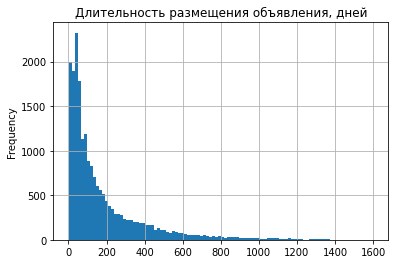

In [83]:
data['days_exposition'].plot(kind='hist', bins=100, range=(1,1600), title='Длительность размещения объявления, дней', grid=True)

In [84]:
data['days_exposition'].median() #рассчитаем медианное значение количества дней экспозиции

95.0

Классическое распределение Пуассона, большинство объявлений снимаются в первые 60 дней, но есть выпадающие значения, посмотрим ближе:

<AxesSubplot:title={'center':'Длительность размещения объявления, дней'}, ylabel='Frequency'>

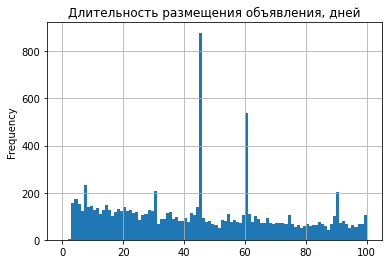

In [85]:
data['days_exposition'].plot(kind='hist', bins=100, range=(0,100), title='Длительность размещения объявления, дней', grid=True)

45 и 60 дни выбиваются из общей динамики, возможно, на сервисе есть какие-то автоматические закрытия объявлений. Достаточно много продаж в первые 7 дней. Есть конечно и объявления, которые лежат годами.

In [86]:
print(data['last_price'].corr(data['total_area'])) #рассчитаем корреляцию Пирсона между последней ценой и общей площадью

0.6538086421356285


<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='last_price', ylabel='total_area'>

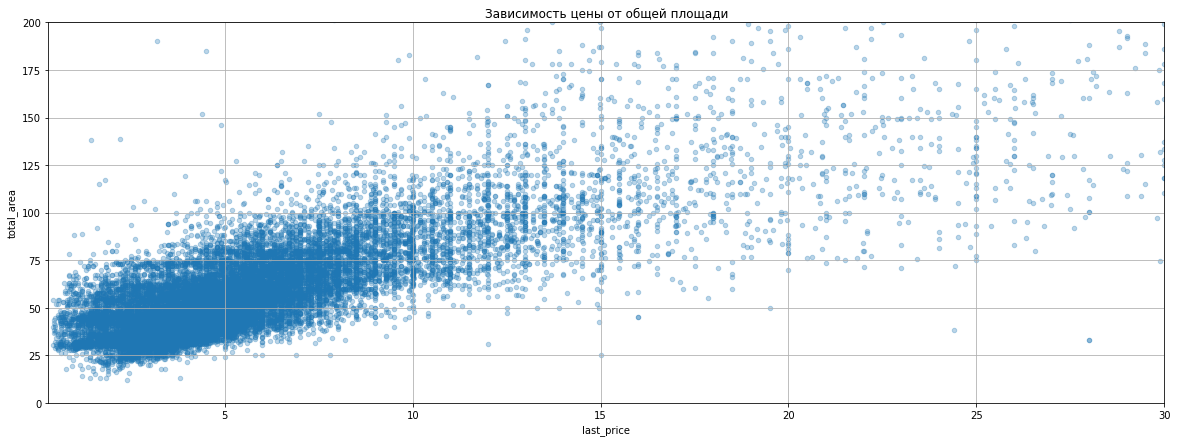

In [87]:
data.plot(kind='scatter', x='last_price', y='total_area', alpha=0.3,  title='Зависимость цены от общей площади', grid=True, figsize=(20,7),xlim=(0.3,30), ylim=(0,200))

Наблюдается достаточно высокая зависимость между общей площадью и конечной стоимостью.

In [88]:
print(data['last_price'].corr(data['living_area'])) #рассчитаем корреляцию Пирсона между последней ценой и жилой площадью

0.5665122388325131


<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='last_price', ylabel='living_area'>

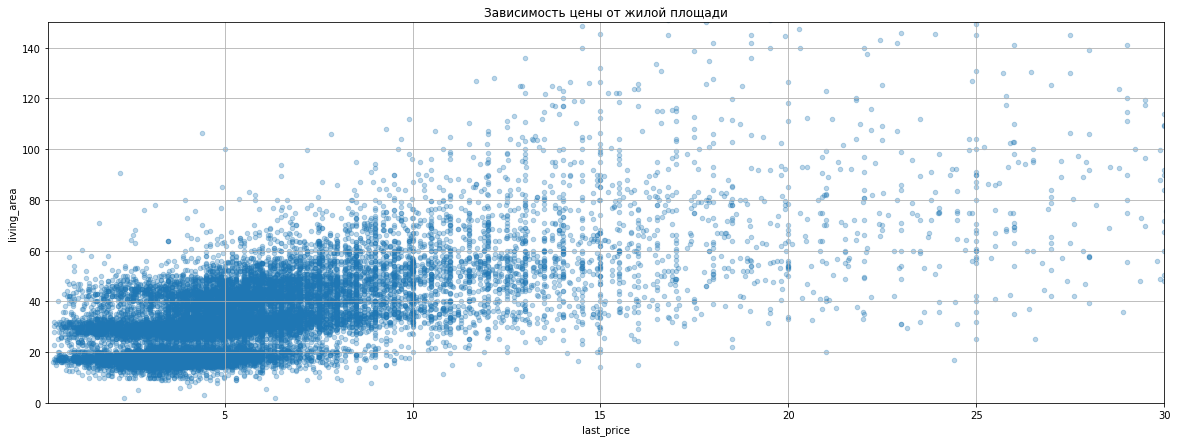

In [89]:
data.plot(kind='scatter', x='last_price', y='living_area', alpha=0.3,  title='Зависимость цены от жилой площади', grid=True, figsize=(20,7),xlim=(0.3,30), ylim=(0,150))

Зависимость между жилой площадью и конечной стоимостью чуть ниже, но тоже значительная.

In [90]:
print(data['last_price'].corr(data['kitchen_area'])) #рассчитаем корреляцию Пирсона между последней ценой и площадью кухни

0.5205312347213077


<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

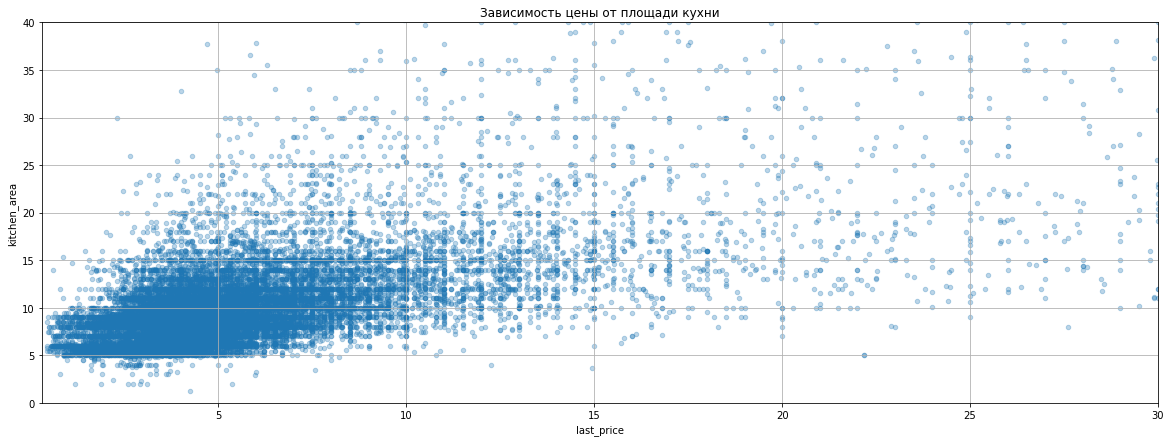

In [91]:
data.plot(kind='scatter', x='last_price', y='kitchen_area', alpha=0.3,  title='Зависимость цены от площади кухни', grid=True, figsize=(20,7),xlim=(0.3,30), ylim=(0,40))

Зависимость между площадью кухни и конечной стоимостью еще ниже, но тоже значительная.

In [92]:
print(data['last_price'].corr(data['rooms'])) #рассчитаем корреляцию Пирсона между последней ценой и числом комнат

0.36341824459566713


<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='last_price', ylabel='rooms'>

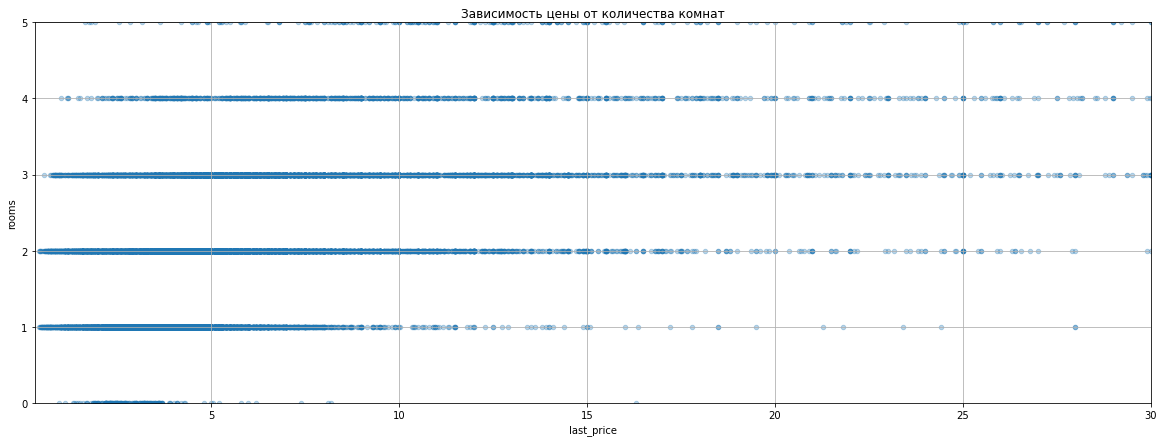

In [93]:
data.plot(kind='scatter', x='last_price', y='rooms', alpha=0.3,  title='Зависимость цены от количества комнат', grid=True, figsize=(20,7),xlim=(0.3,30), ylim=(0,5))

Из сводной таблицы понятнее: подорожание наблюдается от 1 комнатных до 7-комнатных квартир.

In [94]:
data.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'mean']) #построим сводную числа комнат по средней цене

,count,mean
,last_price,last_price
rooms,,
0,197,3.337724
1,8036,3.834080
2,7924,5.592164
3,5797,8.181798
4,1175,13.431852
5,326,23.762082
6,105,31.709752
7,59,51.470069


In [95]:
rooms_norm = data.query('rooms<=7') #посмотрим на значения в наиболее распространенном числе комнат (до 7)

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

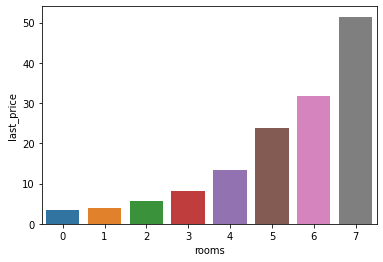

In [96]:
sns.barplot(data = data, x=rooms_norm['rooms'], y='last_price', ci = None) #при исключении аномальных значений, видно четкое подорожание квартир в зависимости от числа комнат

In [97]:
data.pivot_table(index='floor_type', values='last_price', aggfunc=['count', 'mean']) #построим сводную типа этажа по средней цене

,count,mean
,last_price,last_price
floor_type,,
другой,17326,6.674349
первый,2884,4.820066
последний,3440,7.316567


<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

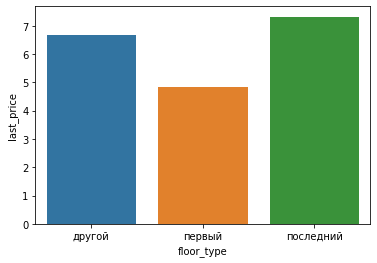

In [98]:
sns.barplot(data = data, x='floor_type', y='last_price', ci = None)

Наиболее дорогие квартиры наблюдаются на последнем этаже, скорее всего это вызвано тем, что такие квартиры часто имеют более высокие потолки и выход на крышу.

<AxesSubplot:xlabel='weekday_exposition', ylabel='last_price'>

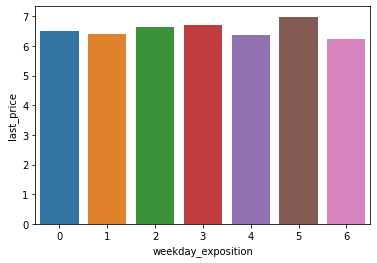

In [99]:
sns.barplot(data = data, x='weekday_exposition', y='last_price', ci = None)

В субботу выкладывают объявления с чуть более дорогими квартирами.

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

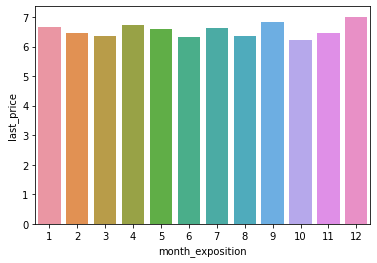

In [100]:
sns.barplot(data = data, x='month_exposition', y='last_price', ci = None)

В сентябре и декабре выкладывают объявления с чуть более дорогими квартирами. В сентябре это возможно связано с началом учебного года (переезд абитуриентов в большие города), а в декабре с общим подорожанием всего к концу года

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

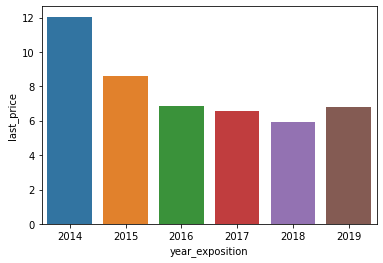

In [101]:
sns.barplot(data = data, x='year_exposition', y='last_price', ci = None) 

С 2014 года средняя цена снижалась и только в 2019 немного отогрыла позиции.

In [102]:
#выведем населенные пункты с наибольшим числом объявлений
top10 = (data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.tolist())
top10

['санкт-петербург',
 'поселок мурино',
 'поселок шушары',
 'всеволожск',
 'пушкин',
 'колпино',
 'поселок парголово',
 'гатчина',
 'деревня кудрово',
 'выборг']

<AxesSubplot:title={'center':'Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений'}, ylabel='locality_name'>

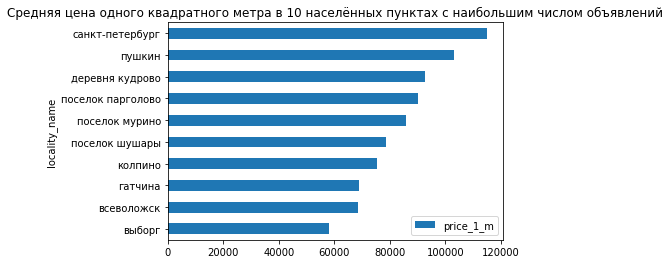

In [103]:
#определим среднюю цену кв.м. в 10 населенных пунктах с наибольшим числом объявлений
top10_mean =(data.query('locality_name in @top10').pivot_table(index='locality_name', values='price_1_m').sort_values(by='price_1_m'))
#построим диаграмму
top10_mean.plot(kind='barh', y='price_1_m', title='Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')

In [104]:
#создадим переменную, где будут строки только с населенным пунктом - Санкт-Петербург
data_spb = data.query('locality_name == "санкт-петербург"')
data_spb.head()

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_1_m,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,санкт-петербург,108.0,51.0,25.0,3,0,2.70,8,16.0,False,False,False,20,13.000,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.370370,3,3,2019,другой,16.0
2,санкт-петербург,56.0,34.3,8.3,2,0,2.65,4,5.0,False,False,False,10,5.196,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.714286,3,8,2015,другой,14.0
3,санкт-петербург,159.0,NaN,NaN,3,0,2.65,9,14.0,False,False,False,0,64.900,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.100629,4,7,2015,другой,7.0
4,санкт-петербург,100.0,32.0,41.0,2,0,3.03,13,14.0,False,False,False,2,10.000,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.000000,1,6,2018,другой,8.0
7,санкт-петербург,71.6,NaN,18.9,2,2,2.65,22,24.0,False,False,False,5,7.915,2019-04-18,NaN,11634.0,23982.0,0.0,NaN,0.0,NaN,110544.692737,3,4,2019,другой,12.0


<AxesSubplot:title={'center':'Cтоимость объектов в зависимости от расстояния до центра Санкт-Петербурга'}>

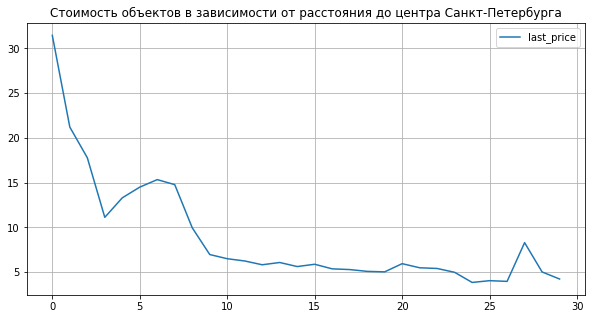

In [105]:
#рассчитаем стоимость объектов в зависимости от расстояния до центра Санкт-Петербурга
spb_km_price = data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price').reset_index()
#построим график
spb_km_price.plot(y='last_price', kind='line', grid=True, figsize=(10,5), title='Cтоимость объектов в зависимости от расстояния до центра Санкт-Петербурга')

Видно, что чем дальше от центра, тем дешевле. Но наблюдается небольшой провал на расстоянии 3 км. можно предположить что это "убитые" квартиры в центре. 

### Общий вывод

Была проанализирована база данных объявлений о продаже недвижимости в Санкт-Петербурге и  Ленинградской области, размещенных за период с 2014-го по 2019-й год.

В процессе предобработки и анализа данных:

    1. Был изучен предоставленный файл;
    2. Определены и заполнены пропущенные значения там, где это возможно; 
    3. Изменены типы данных некоторых переменных; 
    4. Устранены неявные дубликаты в названиях населённых пунктов; 
    5. Устранены редкие и выбивающиеся значения (аномалии) во всех столбцах;
    6. Посчитаны и добавлены новые переменные в таблицу. 
    7. Затем изучены и описаны основные параметры базы данных, построенны гистограммы.

Получены следующие результаты:

    1. В большинстве своем в Санкт-Петербурге и Ленинградской области продаются типичные для жилого фонда России объекты
    2. Изучив, сколько дней продавались квартиры, можно отметить, что значения "45" и "60" дней выбиваются из общего распределения, возможно, на сервисе есть какие-то автоматические закрытия объявлений. Достаточно много продаж в первые 7 дней. Есть конечно и объявления, которые лежат годами. Продажа квартиры в среднем занимает срок до 3-х месяцев.
    3. Отвечая на вопрос: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?" можно проранжировать факторы в порядке убывания влияния: 
        площадь помещения (в т.ч. общая и жилая) - зависимость прямая;
        количество комнат - зависимость прямая;
        этаж  - последний и другой этаж стоят дороже, чем первый;
        дня недели - в субботу выкладывают чуть более дорогие лоты;
        месяца - сентябрь отмечается ростом стоимости недвижимости;
        года - с 2014 года наблюдается снижение стоимости, немного отыгрались цены только в 2019 году.
        
    4. Наиболее дорогостоящая недвижимость наблюдается в Санкт-Петербурге и городе Пушкин, который является крупным туристическим, научным и учебным центром.
        
    5. Удаленность от центра города влияет на стоимость, особенно заметим резкий спад в Санкт-Петербурге после 7 километра, где предположительно заказнчивается центр.
 

Для разработчиков сервиса следует отметить, что наблюдаются проблемы с исходными данными. Рекомендуется изменить форму заполнения объявлений таким образом, чтобы пользователь всегда вводил корректные значения. Подтягивание автоматических данных, нужно настроить так, чтобы было меньше пропущенных значений, а отображение расстояний фиксировалось в округленных километрах.

Также рекомендуется построить модель для определения аномальных значений, например, чрезмерно низкой цены в зависимости от удаленности от центра города, для сигнализации о возможных мошейнических схемах. 



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.


- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод